In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import os
import seaborn as sns
from sklearn.preprocessing import normalize
import pyreadr


In [3]:
path = '../Data/'

#  AGE & SEX ANALYSIS 

In [4]:
number_of_rows = 16
properties = pd.DataFrame({
    'Age': list(range(1, 9)) * 2,
    'sex': [None] * number_of_rows,
    'nodes': [None] * number_of_rows,
    'degree': [None] * number_of_rows,
    'avg_path_length': [None] * number_of_rows,
    'betweenness': [None] * number_of_rows,
    'centrality': [None] * number_of_rows,
    'closeness': [None] * number_of_rows,
    'density': [None] * number_of_rows,
    'modularity': [None] * number_of_rows
    
})

In [5]:
def normalize_matrix(OR_mat):
    # Loop over each row and normalize by row sums, avoiding division by zero
    for i in range(OR_mat.shape[0]):
        row_sum = OR_mat[i, :].sum()
        if row_sum > 0:
            OR_mat[i, :] = OR_mat[i, :] / row_sum
    return OR_mat


## MALE

In [6]:
import igraph as ig

In [7]:
ii=0
for age in range(1, 9):
    # Load adjacency matrix for males
    result = pyreadr.read_r(path+f"3.AdjacencyMatrices/Adj_Matrix_Male_ICD_age_{age}.rds")
    OR = result[None].values
    
    # Normalize adjacency matrix using the R-like method
    OR_normalized =  normalize_matrix(OR.copy())

    # Create graph from adjacency matrix using igraph
    graph = ig.Graph.Weighted_Adjacency(OR_normalized.tolist(), mode="max", attr="weight")

 

    non_zero_nodes = np.where((OR.sum(axis=0) != 0) | (OR.sum(axis=1) != 0))[0]
    properties.at[ii, 'nodes'] = len(non_zero_nodes)

    # Calculate the degree (number of non-zero entries in each row/column) and then average degree for non-zero degree nodes
    row_sums = (OR != 0).sum(axis=1)  # Calculate the number of non-zero entries per row
    non_zero_degrees = row_sums[row_sums != 0]  # Filter out rows with 0 degree
    properties.at[ii, 'degree'] = np.mean(non_zero_degrees)

   
    shortest_paths = graph.shortest_paths_dijkstra()
    
    # Flatten the list of shortest paths, ignore infinity, and calculate the mean
    finite_lengths = [length for sublist in shortest_paths for length in sublist if length < float('inf')]
    if len(finite_lengths) > 0:
        avg_path_length = np.mean(finite_lengths)
    else:
        avg_path_length = float('nan')  # No paths in the graph

    properties.at[ii, 'avg_path_length'] = avg_path_length
    if graph.is_connected():
        #properties.at[ii, 'avg_path_length'] = graph.average_path_length(directed=False)
        closeness = graph.closeness(normalized=True)
    else:
        # Use only the largest connected component
        largest_cc = graph.clusters().giant()
        #properties.at[ii, 'avg_path_length'] = largest_cc.average_path_length(directed = False)
        closeness = largest_cc.closeness(normalized=True)

        # Assign 0 for disconnected nodes (outside largest connected component)
        disconnected_nodes = set(range(graph.vcount())) - set(largest_cc.vs.indices)
        closeness = list(closeness) + [0] * len(disconnected_nodes)

    # Betweenness centrality
    betweenness = graph.betweenness()
    properties.at[ii, 'betweenness'] = np.mean(betweenness)

    # Closeness centrality
    closeness = graph.closeness(normalized=True)

    # Handle disconnected nodes by setting their closeness to 0
    closeness_values = [v if not np.isinf(v) else 0 for v in closeness]
    properties.at[ii, 'closeness'] = np.nanmean(closeness_values)

    # Density
    properties.at[ii, 'density'] = graph.density()

    # Modularity
    communities = graph.community_multilevel()
    properties.at[ii, 'modularity'] = graph.modularity(communities)

    properties.at[ii, 'sex'] = "Male"
    
    ii += 1

/var/folders/q2/kg4fspjs0877v79y79l3_7hc0000gn/T/ipykernel_84546/1155404936.py:24: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  shortest_paths = graph.shortest_paths_dijkstra()
/var/folders/q2/kg4fspjs0877v79y79l3_7hc0000gn/T/ipykernel_84546/1155404936.py:39: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  largest_cc = graph.clusters().giant()


## FEMALE

In [8]:
for age in range(1, 9):
    # Load adjacency matrix for males
    result = pyreadr.read_r(path+f"3.AdjacencyMatrices/Adj_Matrix_Female_ICD_age_{age}.rds")
    OR = result[None].values
    
    # Normalize adjacency matrix using the R-like method
    OR_normalized =  normalize_matrix(OR.copy())

    # Create graph from adjacency matrix using igraph
    graph = ig.Graph.Weighted_Adjacency(OR_normalized.tolist(), mode="max", attr="weight")

 

    non_zero_nodes = np.where((OR.sum(axis=0) != 0) | (OR.sum(axis=1) != 0))[0]
    properties.at[ii, 'nodes'] = len(non_zero_nodes)

    # Calculate the degree (number of non-zero entries in each row/column) and then average degree for non-zero degree nodes
    row_sums = (OR != 0).sum(axis=1)  # Calculate the number of non-zero entries per row
    non_zero_degrees = row_sums[row_sums != 0]  # Filter out rows with 0 degree
    properties.at[ii, 'degree'] = np.mean(non_zero_degrees)

   
    shortest_paths = graph.shortest_paths_dijkstra()
    
    # Flatten the list of shortest paths, ignore infinity, and calculate the mean
    finite_lengths = [length for sublist in shortest_paths for length in sublist if length < float('inf')]
    if len(finite_lengths) > 0:
        avg_path_length = np.mean(finite_lengths)
    else:
        avg_path_length = float('nan')  # No paths in the graph

    properties.at[ii, 'avg_path_length'] = avg_path_length
    if graph.is_connected():
        #properties.at[ii, 'avg_path_length'] = graph.average_path_length(directed=False)
        closeness = graph.closeness(normalized=True)
    else:
        # Use only the largest connected component
        largest_cc = graph.clusters().giant()
        #properties.at[ii, 'avg_path_length'] = largest_cc.average_path_length(directed = False)
        closeness = largest_cc.closeness(normalized=True)

        # Assign 0 for disconnected nodes (outside largest connected component)
        disconnected_nodes = set(range(graph.vcount())) - set(largest_cc.vs.indices)
        closeness = list(closeness) + [0] * len(disconnected_nodes)

    # Betweenness centrality
    betweenness = graph.betweenness()
    properties.at[ii, 'betweenness'] = np.mean(betweenness)

    # Closeness centrality
    closeness = graph.closeness(normalized=True)

    # Handle disconnected nodes by setting their closeness to 0
    closeness_values = [v if not np.isinf(v) else 0 for v in closeness]
    properties.at[ii, 'closeness'] = np.nanmean(closeness_values)

    # Density
    properties.at[ii, 'density'] = graph.density()

    # Modularity
    communities = graph.community_multilevel()
    properties.at[ii, 'modularity'] = graph.modularity(communities)

    properties.at[ii, 'sex'] = "Female"
    
    ii += 1

/var/folders/q2/kg4fspjs0877v79y79l3_7hc0000gn/T/ipykernel_84546/2165402764.py:23: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  shortest_paths = graph.shortest_paths_dijkstra()
/var/folders/q2/kg4fspjs0877v79y79l3_7hc0000gn/T/ipykernel_84546/2165402764.py:38: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  largest_cc = graph.clusters().giant()


In [9]:
custom_col = ["#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C", "#FB9A99", "#E31A1C",
              "#FDBF6F", "#FF7F00", "#CAB2D6", "#6A3D9A", "#FFFF99", "#B15928"]

custom_labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

In [10]:
plt.rcParams['font.size'] = 16

In [11]:
# Due to differences in handling connected components in R and Python, 
# the results for closeness and average path length differ slightly.

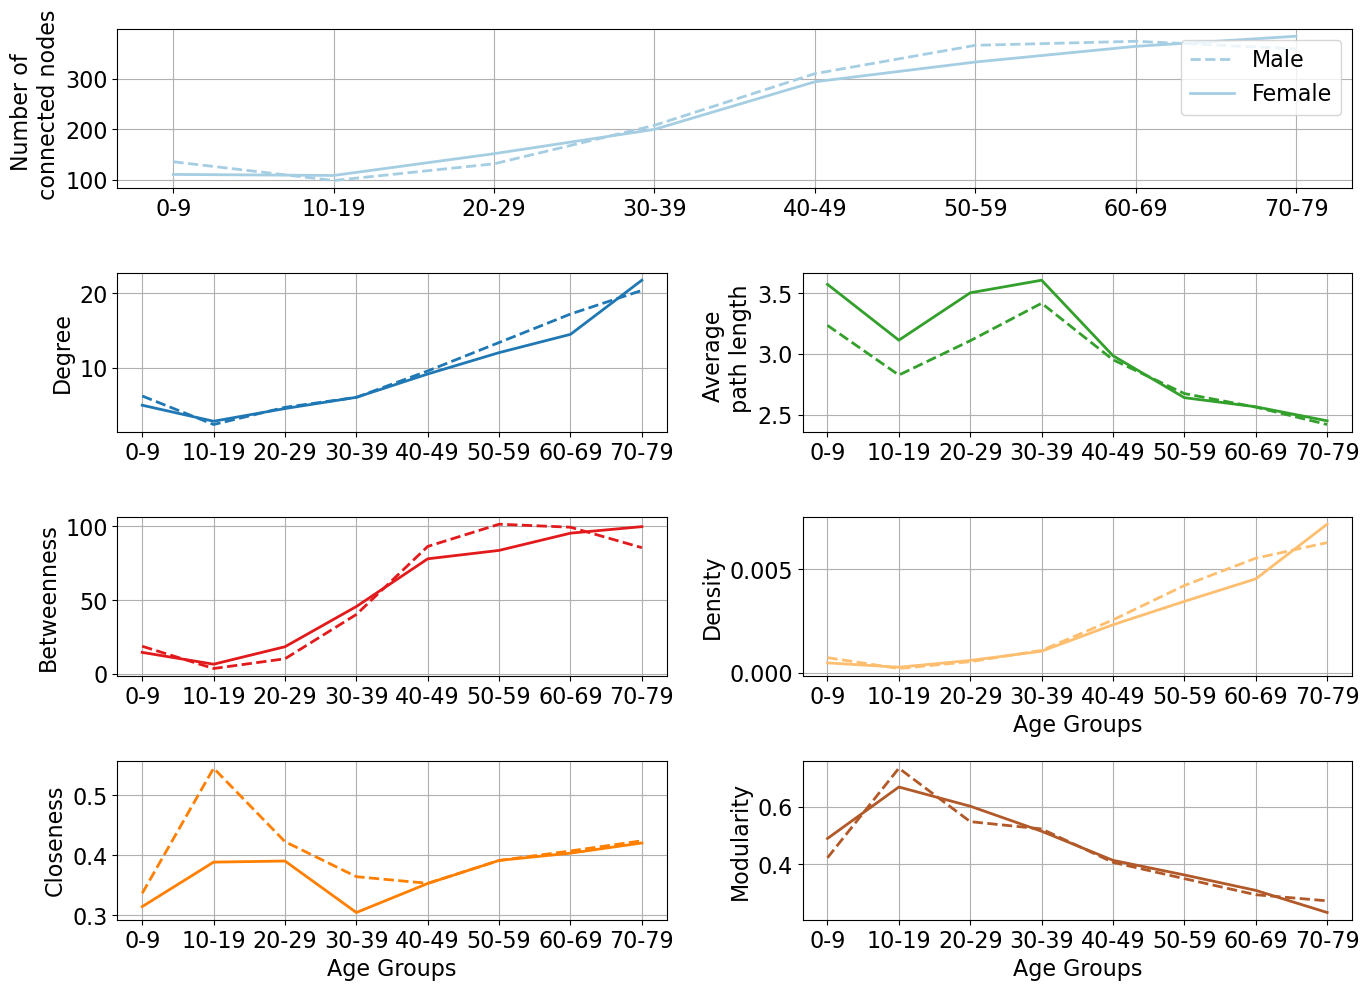

In [12]:
fig = plt.figure(figsize=(14, 10))   
gs = fig.add_gridspec(4, 2)   

# Plot 0: Number of connected nodes  
ax0 = fig.add_subplot(gs[0, :])
ax0.plot(properties['Age'][properties['sex'] == 'Male'], properties['nodes'][properties['sex'] == 'Male'], label='Male', color=custom_col[0], linewidth=2, linestyle='--')
ax0.plot(properties['Age'][properties['sex'] == 'Female'], properties['nodes'][properties['sex'] == 'Female'], label='Female', color=custom_col[0], linewidth=2, linestyle='-')
ax0.set_ylabel("Number of \n connected nodes")
ax0.set_xlabel("")
ax0.set_xticks(range(1, 9))
ax0.set_xticklabels(custom_labels)
ax0.grid(True)
ax0.legend(loc="upper right")

# Plot 1: Degree  
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(properties['Age'][properties['sex'] == 'Male'], properties['degree'][properties['sex'] == 'Male'], label='Male', color=custom_col[1], linewidth=2, linestyle='--')
ax1.plot(properties['Age'][properties['sex'] == 'Female'], properties['degree'][properties['sex'] == 'Female'], label='Female', color=custom_col[1], linewidth=2, linestyle='-')
ax1.set_ylabel("Degree")
ax1.set_xlabel("")
ax1.set_xticks(range(1, 9))
ax1.set_xticklabels(custom_labels)
ax1.grid(True)

# Plot 2: Average Path Length  
ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(properties['Age'][properties['sex'] == 'Male'], properties['avg_path_length'][properties['sex'] == 'Male'], label='Male', color=custom_col[3], linewidth=2, linestyle='--')
ax2.plot(properties['Age'][properties['sex'] == 'Female'], properties['avg_path_length'][properties['sex'] == 'Female'], label='Female', color=custom_col[3], linewidth=2, linestyle='-')
ax2.set_ylabel("Average \n path length")
ax2.set_xlabel("")
ax2.set_xticks(range(1, 9))
ax2.set_xticklabels(custom_labels)
ax2.grid(True)

# Plot 3: Betweenness  
ax3 = fig.add_subplot(gs[2, 0])
ax3.plot(properties['Age'][properties['sex'] == 'Male'], properties['betweenness'][properties['sex'] == 'Male'], label='Male', color=custom_col[5], linewidth=2, linestyle='--')
ax3.plot(properties['Age'][properties['sex'] == 'Female'], properties['betweenness'][properties['sex'] == 'Female'], label='Female', color=custom_col[5], linewidth=2, linestyle='-')
ax3.set_ylabel("Betweenness")
ax3.set_xlabel("")
ax3.set_xticks(range(1, 9))
ax3.set_xticklabels(custom_labels)
ax3.grid(True)

# Plot 4: Density 
ax4 = fig.add_subplot(gs[2, 1])
ax4.plot(properties['Age'][properties['sex'] == 'Male'], properties['density'][properties['sex'] == 'Male'], label='Male', color=custom_col[6], linewidth=2, linestyle='--')
ax4.plot(properties['Age'][properties['sex'] == 'Female'], properties['density'][properties['sex'] == 'Female'], label='Female', color=custom_col[6], linewidth=2, linestyle='-')
ax4.set_ylabel("Density")
ax4.set_xlabel("Age Groups")
ax4.set_xticks(range(1, 9))
ax4.set_xticklabels(custom_labels)
ax4.grid(True)

# Plot 5: Closeness  
ax5 = fig.add_subplot(gs[3, 0])
ax5.plot(properties['Age'][properties['sex'] == 'Male'], properties['closeness'][properties['sex'] == 'Male'], label='Male', color=custom_col[7], linewidth=2, linestyle='--')
ax5.plot(properties['Age'][properties['sex'] == 'Female'], properties['closeness'][properties['sex'] == 'Female'], label='Female', color=custom_col[7], linewidth=2, linestyle='-')
ax5.set_ylabel("Closeness")
ax5.set_xlabel("Age Groups")
ax5.set_xticks(range(1, 9))
ax5.set_xticklabels(custom_labels)
ax5.grid(True)

# Plot 6: Modularity  
ax6 = fig.add_subplot(gs[3, 1])
ax6.plot(properties['Age'][properties['sex'] == 'Male'], properties['modularity'][properties['sex'] == 'Male'], label='Male', color=custom_col[11], linewidth=2, linestyle='--')
ax6.plot(properties['Age'][properties['sex'] == 'Female'], properties['modularity'][properties['sex'] == 'Female'], label='Female', color=custom_col[11], linewidth=2, linestyle='-')
ax6.set_ylabel("Modularity")
ax6.set_xlabel("Age Groups")
ax6.set_xticks(range(1, 9))
ax6.set_xticklabels(custom_labels)
ax6.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()